In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Dataset Source: https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/data

In [2]:
# Keeping the main data frame in a separate data variable for future use
data = pd.read_csv("heart_attack_prediction_dataset.csv")

In [3]:
# Copying data data frame into a new variable for manupulation
df = data.copy()

In [4]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0.0,0.0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1.0,1.0,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1.0,0.0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1.0,NaN,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1.0,1.0,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [6]:
df.shape

(8763, 26)

<h2>Initial Obseravation</h2>
<p>We have 26 columns (25 features & 1 class) to work with.<br>As we are predicting heart attack risk, we select Heart Attack Risk as our class column.<br>Because Heart Attack Risk only consists of 0 & 1, this is a classification problem.<br>Our dataset consists of both Categorical & Quantitive features.</p>

<h4>Class Imbalance</h4>

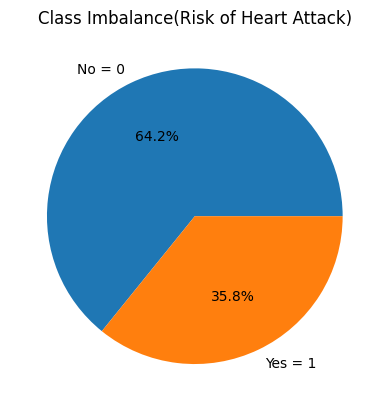

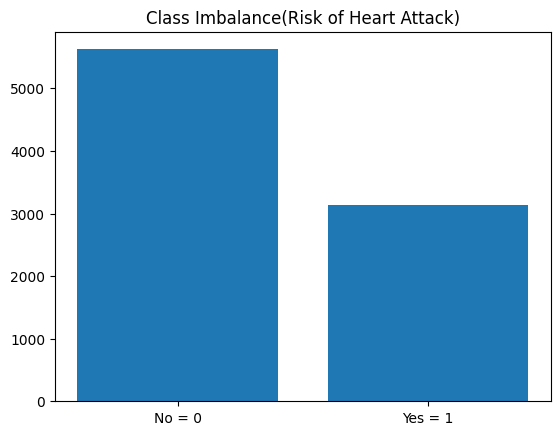

In [7]:
# Get pie chart slice labels

labels = ["No = 0", "Yes = 1"]

# Get pie chart slice values
values = df["Heart Attack Risk"].value_counts().to_numpy()

# Create a pie chart of the number of customers for each country origin
plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.title("Class Imbalance(Risk of Heart Attack)")
plt.show()

plt.bar(x = labels, height = values)
plt.title("Class Imbalance(Risk of Heart Attack)")
plt.show()

<p>As we can see, class imbalance is present in the dataset</p>

<h1>Data Preprocessing</h1>

<h3>Handling Null Values</h3>

In [9]:
# Detect Columns Containing Null Values
df.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           4
Family History                     3
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            4
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            2
Income                             0
BMI                                5
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [118]:
df.dtypes
# Mode, median, mean
##Quantititive & Categorical

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                           float64
Family History                     float64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [119]:
#Dropping Patient ID

# df = df.drop(["Patient ID","Country","Continent","Hemisphere"], axis = 1)
df = df.drop("Patient ID",axis = 1)

# Number of unique values in each column

df.nunique()

Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8759
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8761
Income                             8615
BMI                                8758
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2
Heart Attack Risk                     2


In [120]:
#For Categorical values we use mode for imputation and for 
#Quantitative values we use mean for imputation

#The columns containing null values are-

# Name                             N-Null     N-Unique
# Diabetes                           4           2
# Family History                     3           2
# Exercise Hours Per Week            4         8759
# Sedentary Hours Per Day            2         8761
# BMI                                5         8758

In [121]:
# Handle both type of values(Categorical & Quantitative) and impute them

for col_name in df.columns:
    
    col_data = df[col_name]
    
    if col_data.isna().sum() > 0 and col_data.nunique() <= 2: # Categorical
        col_data = col_data.fillna(value = col_data.mode().iloc[0],inplace = True) # Handle Categorical Values

    elif col_data.isna().sum() > 0 and col_data.nunique() > 2: # Handle Quantitative Values
        col_data = col_data.fillna(value = col_data.mean(),inplace = True)
    


In [122]:
# Check the current null value state

df.isna().sum()

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

<h3>Encoding</h3>

In [123]:
# Checking Datatypes

df.dtypes

Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                           float64
Family History                     float64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere 

In [124]:
# Spliting Blood Pressure
#str = 180/120 = ["180", "120"]
df[['BP_Systolic', 'BP_Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

In [125]:
# Convert the columns to numeric
df['BP_Systolic'] = pd.to_numeric(df['BP_Systolic'])
df['BP_Diastolic'] = pd.to_numeric(df['BP_Diastolic'])

In [126]:
#Dropping Blood Pressure
df = df.drop("Blood Pressure", axis = 1)

In [127]:
# Columns we need to encode- 
# - Sex
# - Blood Pressure
# - Diet
# - Country
# - Continent 
# - Hemisphere

In [128]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [129]:
#Initialize LabelEncoder
encoder = LabelEncoder()

In [130]:
#Handle Encoding

for col_name in df.columns:
    
    if df[col_name].dtype == "object":
        df[col_name] = encoder.fit_transform(df[[col_name]])


0         Male
1         Male
2       Female
3         Male
4         Male
         ...  
8758      Male
8759    Female
8760      Male
8761      Male
8762    Female
Name: Sex, Length: 8763, dtype: object
0         Average
1       Unhealthy
2         Healthy
3         Average
4       Unhealthy
          ...    
8758      Healthy
8759      Healthy
8760      Average
8761    Unhealthy
8762      Healthy
Name: Diet, Length: 8763, dtype: object
0            Argentina
1               Canada
2               France
3               Canada
4             Thailand
             ...      
8758          Thailand
8759            Canada
8760            Brazil
8761            Brazil
8762    United Kingdom
Name: Country, Length: 8763, dtype: object
0       South America
1       North America
2              Europe
3       North America
4                Asia
            ...      
8758             Asia
8759    North America
8760    South America
8761    South America
8762           Europe
Name: Continent, Len

In [131]:
#Check current datatype state

df.dtypes

Age                                  int64
Sex                                  int32
Cholesterol                          int64
Heart Rate                           int64
Diabetes                           float64
Family History                     float64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int32
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                              int32
Continent                            int32
Hemisphere                           int32
Heart Attac

<h2>Correlation Matrix</h2>

In [133]:
df.shape

(8763, 26)

In [134]:
#We have 25 features to work with (excluding the Heart Attack Risk column)

In [135]:
corr = df.corr()

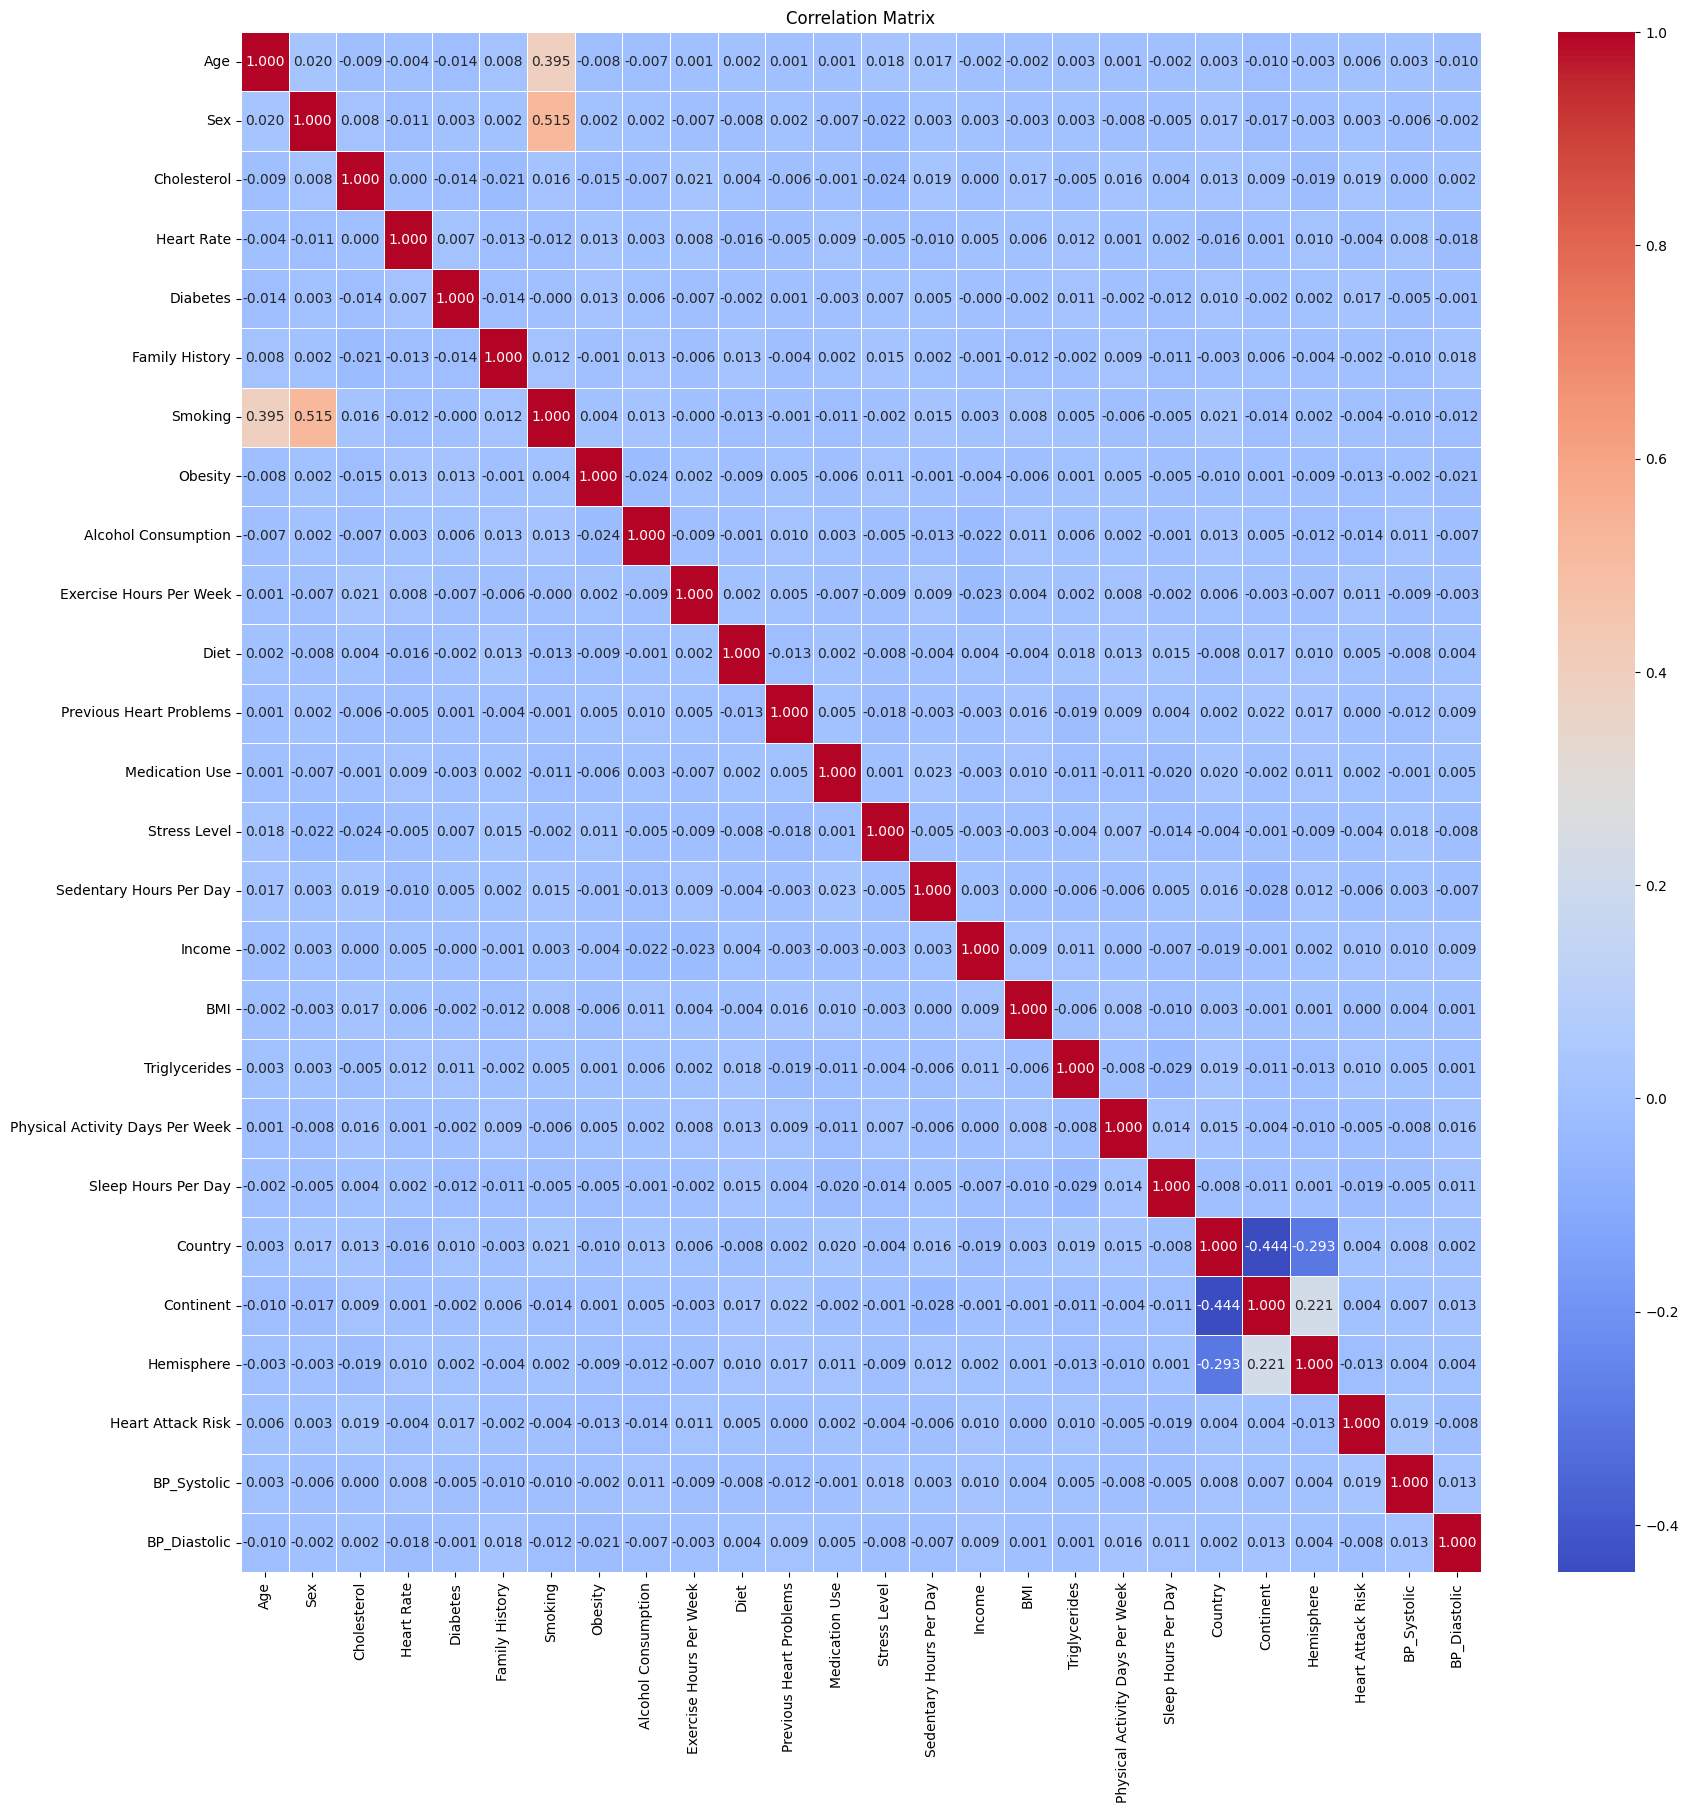

In [136]:
#Correlation Heatmap

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<ul>
<h5>Key Findings</h5>
<li>Heart Attack risk has highest correlation with Diabetes, Cholestrol and Exercise Hours Per Weak</li>
<li>Heart attack Risk is not much dependent on Sedentary Hours Per Day</li>
<li>Alcohol Consumption has no stronger link with Heart Attack Risk</li>
<li>Smoking is not a major cause of Heart Attack</li> 
</ul>


<h1>Train Test Split(Before Scaling)</h1>

In [ ]:
#Ml Model -> Train(X, y) -> Test(X) return y_test_predicted

In [137]:
X = df.drop("Heart Attack Risk",axis = 1) #Features #9000 - 70% train 30% test

In [138]:
y = df["Heart Attack Risk"] #Class #9000 - 70% train 30% test

In [139]:
#import train test split
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify = y)

<h1>Model Training<h1>

<h3>Decision Tree Classifier(Before Scaling)</h3>

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
dtc_before_scaling = DecisionTreeClassifier()

In [143]:
dtc_before_scaling.fit(X_train,y_train)

DecisionTreeClassifier()

In [144]:
from sklearn.metrics import accuracy_score

In [145]:
y_predicted_train = dtc_before_scaling.predict(X_train)

In [146]:
dtc_train_score_before_scaling = accuracy_score(y_train,y_predicted_train)

In [147]:
print("Train Score:",dtc_train_score_before_scaling)

Train Score: 1.0


In [148]:
y_predicted_test =  dtc_before_scaling.predict(X_test)

In [149]:
dtc_test_score_before_scaling =accuracy_score(y_test,y_predicted_test)

In [150]:
print("Test Score:",dtc_test_score_before_scaling)

Test Score: 0.5283377710155953


<h2>Scaling<h2>

In [151]:
df.dtypes

Age                                  int64
Sex                                  int32
Cholesterol                          int64
Heart Rate                           int64
Diabetes                           float64
Family History                     float64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int32
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                              int32
Continent                            int32
Hemisphere                           int32
Heart Attac

In [152]:
df.nunique()

Age                                  73
Sex                                   2
Cholesterol                         281
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8760
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8762
Income                             8615
BMI                                8759
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2
Heart Attack Risk                     2
BP_Systolic                          91


In [153]:
df.head(5)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,67,1,208,72,0.0,0.0,1,0,0,4.168189,...,31.251233,286,0,6,0,5,1,0,158,88
1,21,1,389,98,1.0,1.0,1,1,1,1.813242,...,27.194973,235,1,7,3,4,0,0,165,93
2,21,0,324,72,1.0,0.0,0,0,0,2.078353,...,28.176571,587,4,4,6,3,0,0,174,99
3,84,1,383,73,1.0,0.0,1,0,1,9.828130,...,36.464704,378,3,4,3,4,0,0,163,100
4,66,1,318,93,1.0,1.0,1,1,0,5.804299,...,21.809144,231,1,5,16,1,0,0,91,88


In [154]:
#We can scale those columns where the nunique value is greater than 10

In [155]:
from sklearn.preprocessing import MinMaxScaler

In [156]:
scaler = MinMaxScaler()

In [157]:
for col_name in df.columns:
    if df[col_name].nunique()>10: 
        df[col_name] = scaler.fit_transform(df[[col_name]])

In [158]:
df.head(5)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,0.680556,1,0.314286,0.457143,0.0,0.0,1,0,0,0.208326,...,0.602363,0.332468,0,6,0.000000,5,1,0,0.755556,0.56
1,0.041667,1,0.960714,0.828571,1.0,1.0,1,1,1,0.090557,...,0.417945,0.266234,1,7,0.157895,4,0,0,0.833333,0.66
2,0.041667,0,0.728571,0.457143,1.0,0.0,0,0,0,0.103815,...,0.462573,0.723377,4,4,0.315789,3,0,0,0.933333,0.78
3,0.916667,1,0.939286,0.471429,1.0,0.0,1,0,1,0.491376,...,0.839394,0.451948,3,4,0.157895,4,0,0,0.811111,0.80
4,0.666667,1,0.707143,0.757143,1.0,1.0,1,1,0,0.290147,...,0.173077,0.261039,1,5,0.842105,1,0,0,0.011111,0.56


<h1>Train Test Split(After Scaling)<h2>

In [159]:
X = df.drop("Heart Attack Risk",axis = 1)

In [160]:
y = df["Heart Attack Risk"]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

<h3>Decision Tree Classifier(After Scaling)</h3>

In [162]:
dtc_after_scaling = DecisionTreeClassifier()

In [163]:
dtc_after_scaling.fit(X_train,y_train)

DecisionTreeClassifier()

In [164]:
y_predicted_train_dtc = dtc_after_scaling.predict(X_train)

In [165]:
dtc_train_score = accuracy_score(y_train,y_predicted_train_dtc)

In [166]:
print("Train Score:",dtc_train_score)

Train Score: 1.0


In [167]:
y_predicted_test_dtc =  dtc_after_scaling.predict(X_test)

In [168]:
dtc_test_score = accuracy_score(y_test,y_predicted_test_dtc)

In [169]:
print("Test Score:",dtc_test_score)

Test Score: 0.5252947888931152


<BarContainer object of 2 artists>

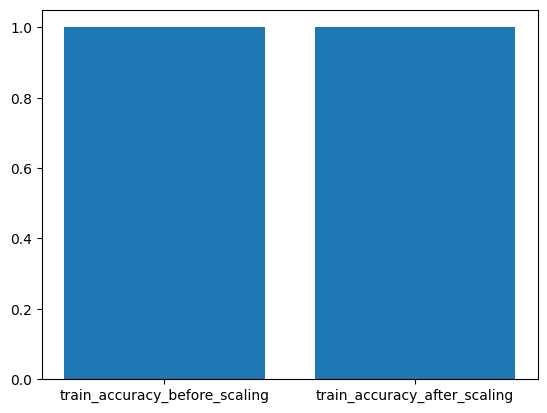

In [170]:
plt.bar(x = ["train_accuracy_before_scaling", "train_accuracy_after_scaling"],
        height =[dtc_train_score_before_scaling, dtc_train_score] )

<BarContainer object of 2 artists>

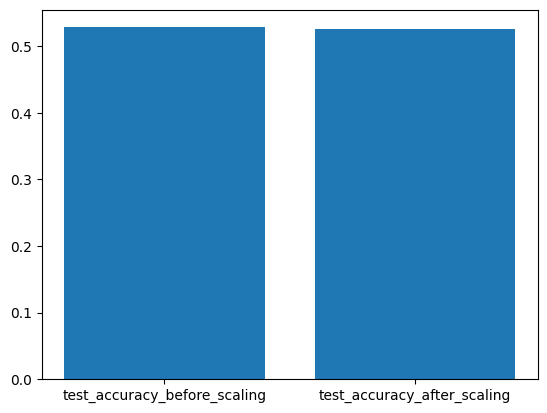

In [171]:
plt.bar(x = ["test_accuracy_before_scaling", "test_accuracy_after_scaling"],
        height =[dtc_test_score_before_scaling, dtc_test_score] )

<p>As we can see, the train and test accuracy of Decision Tree Classifier before and after scaling is quite marginal.
We are going to use the scaled train-test set from now on so that our ml models can process the data
more efficiently</p>

<h1>Random Forest Classifier</h1>

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
rfc = RandomForestClassifier()

In [174]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [175]:
y_predicted_train_rfc = rfc.predict(X_train)

In [176]:
rfc_train_score = accuracy_score(y_train,y_predicted_train_rfc)

In [177]:
rfc_train_score

1.0

In [178]:
y_predicted_test_rfc = rfc.predict(X_test)

In [179]:
rfc_test_score = accuracy_score(y_test,y_predicted_test_rfc)

In [180]:
rfc_test_score

0.6371243818942564

<h1>KNN(K-Nearest Neighbor)</h1>

In [181]:
#Import KNNClassifier
from sklearn.neighbors import KNeighborsClassifier

In [182]:
knn = KNeighborsClassifier(n_neighbors=3)

In [183]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [184]:
y_predicted_train_knn =  knn.predict(X_train)

In [185]:
knn_train_score = accuracy_score(y_train,y_predicted_train_knn)

In [186]:
knn_train_score

0.7663840886860124

In [187]:
y_predicted_test_knn = knn.predict(X_test)

In [188]:
knn_test_score = accuracy_score(y_test,y_predicted_test_knn)

In [189]:
knn_test_score

0.5705591479650057

<h1>Comparison Analysis</h1>

<h3>Prediction Accuracy</h3>

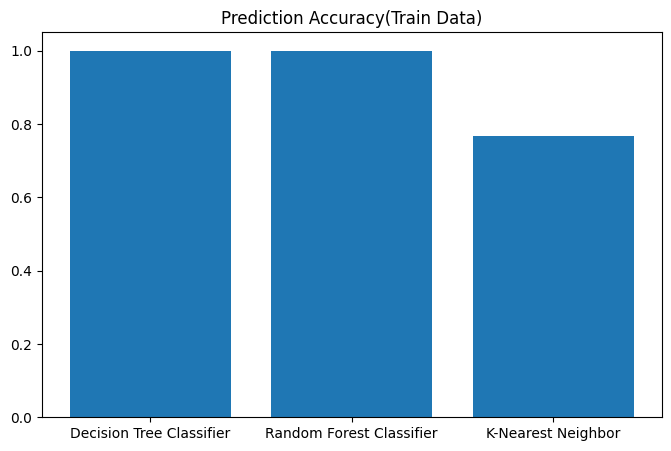

In [190]:
#Train
plt.figure(figsize=(8,5))

labels = ["Decision Tree Classifier", "Random Forest Classifier", "K-Nearest Neighbor"]
values = [dtc_train_score, rfc_train_score, knn_train_score]

plt.bar(x = labels, height = values)
plt.title("Prediction Accuracy(Train Data)")
plt.show()

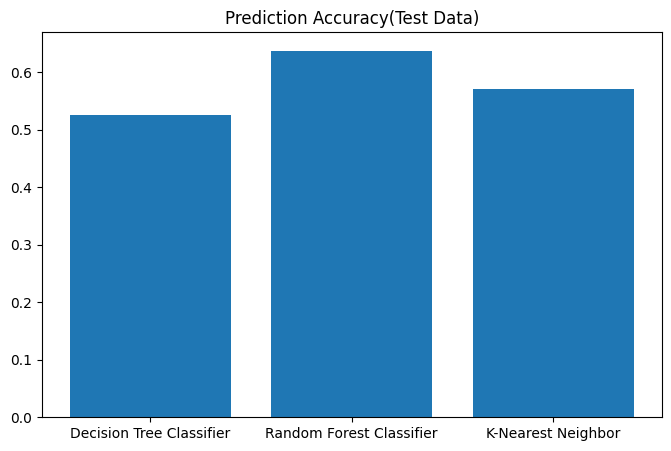

In [191]:
#Test
plt.figure(figsize=(8,5))

labels = ["Decision Tree Classifier", "Random Forest Classifier", "K-Nearest Neighbor"]
values = [dtc_test_score, rfc_test_score, knn_test_score]

plt.bar(x = labels, height = values)
plt.title("Prediction Accuracy(Test Data)")
plt.show()


<h3>Precision & Recall Score Analysis</h3>

In [192]:
import sklearn.metrics as mt

In [193]:
model_train_data = [y_predicted_train_dtc,y_predicted_train_rfc,y_predicted_train_knn]
model_test_data = [y_predicted_test_dtc,y_predicted_test_rfc,y_predicted_test_knn]

In [194]:
#Train
model_train_precision_scores = []
model_train_recall_scores = []

for model_data in model_train_data:
    model_train_precision_scores.append(mt.precision_score(model_data,y_train))
    model_train_recall_scores.append(mt.recall_score(model_data,y_train))

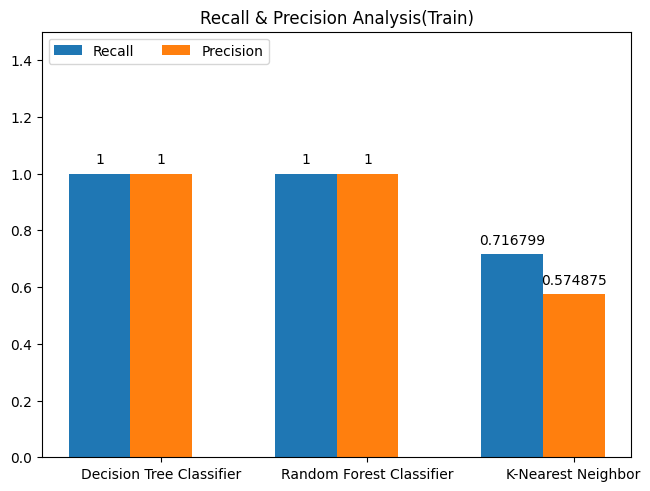

In [195]:
labels = ["Decision Tree Classifier", "Random Forest Classifier", "K-Nearest Neighbor"]
data = {
    'Recall': model_train_recall_scores,
    'Precision': model_train_precision_scores,
    
}

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout="constrained")

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects,label_type="edge",padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Recall & Precision Analysis(Train)')
ax.set_xticks(x + width, labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.5)

plt.show()

In [196]:
#Test
model_test_precision_scores = []
model_test_recall_scores = []

for model_data in model_test_data:
    model_test_precision_scores.append(mt.precision_score(model_data,y_test))
    model_test_recall_scores.append(mt.recall_score(model_data,y_test))


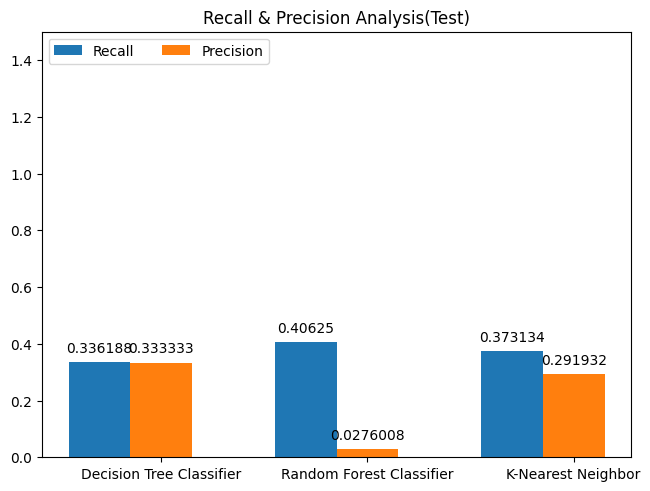

In [197]:
labels = ["Decision Tree Classifier", "Random Forest Classifier", "K-Nearest Neighbor"]
data = {
    'Recall': model_test_recall_scores,
    'Precision': model_test_precision_scores,
}

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout="constrained")

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects,label_type="edge",padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Recall & Precision Analysis(Test)')
ax.set_xticks(x + width, labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.5)

plt.show()

<h3>Confusion Matrix</h3>

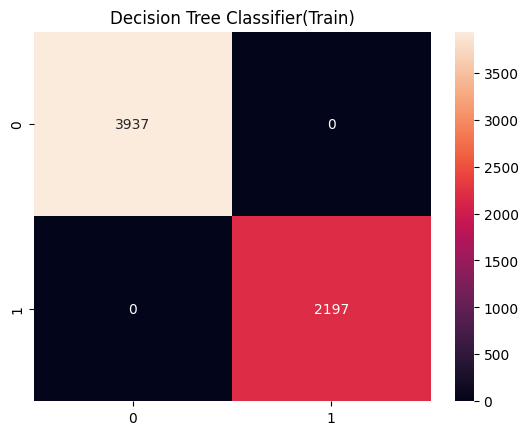

In [198]:
#Train
sns.heatmap(mt.confusion_matrix(y_predicted_train_dtc,y_train),annot = True,fmt = "d")
plt.title("Decision Tree Classifier(Train)")
plt.show()

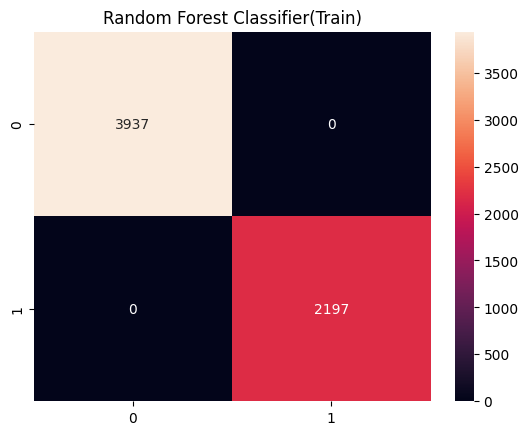

In [199]:
sns.heatmap(mt.confusion_matrix(y_predicted_train_rfc,y_train),annot = True,fmt = "d")
plt.title("Random Forest Classifier(Train)")
plt.show()

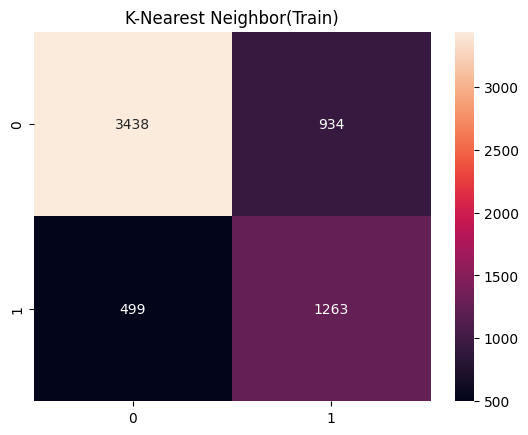

In [200]:
sns.heatmap(mt.confusion_matrix(y_predicted_train_knn,y_train),annot = True,fmt = "d")
plt.title("K-Nearest Neighbor(Train)")
plt.show()

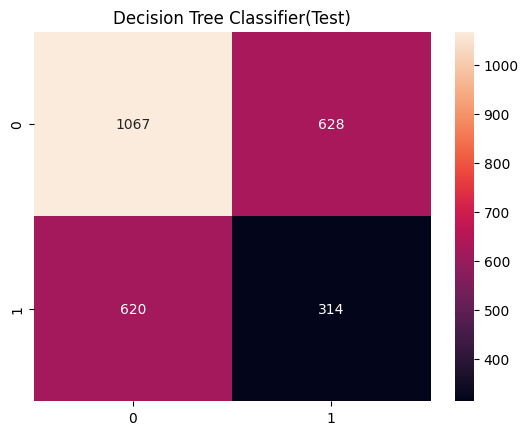

In [201]:
#Test
sns.heatmap(mt.confusion_matrix(y_predicted_test_dtc,y_test),annot = True,fmt = "d")
plt.title("Decision Tree Classifier(Test)")
plt.show()

In [ ]:
# 0 = False , 1 = True

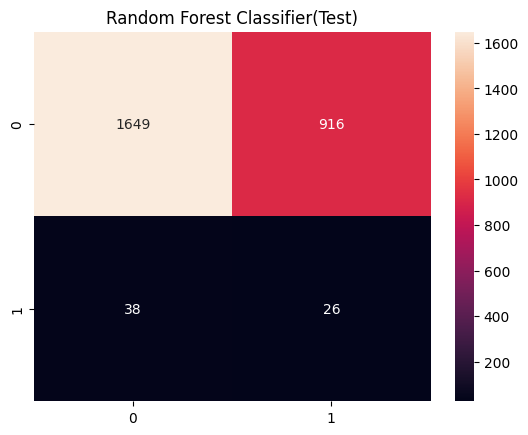

In [202]:
sns.heatmap(mt.confusion_matrix(y_predicted_test_rfc,y_test),annot = True,fmt = "d")
plt.title("Random Forest Classifier(Test)")
plt.show()

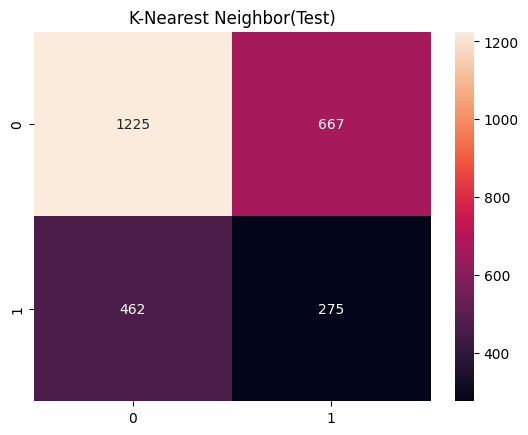

In [203]:
sns.heatmap(mt.confusion_matrix(y_predicted_test_knn,y_test),annot = True,fmt = "d")
plt.title("K-Nearest Neighbor(Test)")
plt.show()

<h3>Classification Report</h3>

In [204]:
print(mt.classification_report(y_predicted_test_dtc,y_test))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1695
           1       0.33      0.34      0.33       934

    accuracy                           0.53      2629
   macro avg       0.48      0.48      0.48      2629
weighted avg       0.53      0.53      0.53      2629



In [205]:
print(mt.classification_report(y_predicted_test_rfc,y_test))

              precision    recall  f1-score   support

           0       0.98      0.64      0.78      2565
           1       0.03      0.41      0.05        64

    accuracy                           0.64      2629
   macro avg       0.50      0.52      0.41      2629
weighted avg       0.95      0.64      0.76      2629



In [206]:
print(mt.classification_report(y_predicted_test_knn,y_test))

              precision    recall  f1-score   support

           0       0.73      0.65      0.68      1892
           1       0.29      0.37      0.33       737

    accuracy                           0.57      2629
   macro avg       0.51      0.51      0.51      2629
weighted avg       0.60      0.57      0.58      2629



<h4>Decision Tree Classifier:</h4>

<h5>Precision/Recall/F1-score for Class 0:</h5> Moderate values around 0.61/0.64/0.62, indicating a balanced performance in identifying the negative class.
<h5>Precision/Recall/F1-score for Class 1:</h5> Lower values around 0.37/0.34/0.36, suggesting challenges in correctly identifying positive instances.
<h5>Overall Accuracy:</h5> 0.52, indicating a limited ability to correctly classify instances.
<h4>Random Forest Classifier:</h4>

<h5>Precision/Recall/F1-score for Class 0:</h5> High precision (0.98) but lower recall (0.64), indicating a tendency to correctly classify negatives but missing some.
<h5>Precision/Recall/F1-score for Class 1:</h5> Very low precision (0.02) but higher recall (0.40), indicating the model identifies positives but with many false positives.
<h5>Overall Accuracy:</h5> 0.64, suggesting better performance compared to the Decision Tree, but challenges in handling Class 1.
<h4>KNN (K-Nearest Neighbors):</h4>

<h5>Precision/Recall/F1-score for Class 0:</h5> Moderate values around 0.70/0.64/0.67, indicating a relatively balanced performance for the negative class.
<h5>Precision/Recall/F1-score for Class 1:</h5> Lower values around 0.28/0.34/0.30, similar to the Decision Tree, suggesting challenges in correctly identifying positive instances.
<h5>Overall Accuracy:</h5> 0.55, indicating a moderate ability to correctly classify instances.

<h1>Conclusion</h1>

<p>In summary, the Decision Tree and KNN models demonstrate similarities in their struggles to effectively identify positive instances (Class 1), reflected in both models' lower precision and recall for this class. The Random Forest model exhibits superior precision for Class 0 but faces challenges with Class 1, suggesting a potential imbalance in the dataset. The overall accuracy of all models is modest, indicating room for improvement or the need to address underlying issues within the data.

Considering the performance metrics and the specific scenario:

The Decision Tree and KNN models offer comparable results, both showing limitations in accurately identifying positive instances.
While the Random Forest model demonstrates higher precision for the majority class, its lower recall for Class 1 implies an elevated rate of false negatives.
In this scenario, none of the models stand out as a clear winner. The choice of the most suitable model depends on the specific goals and constraints of the application. Further exploration, such as addressing class imbalance, refining features, or trying different algorithms, may be necessary to enhance the models' effectiveness in capturing the complexities of the underlying data.set.</p>